<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/05_CONVOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# WHEN LEARNING DEEP -> like faces, similarity between faces/objects, detecting actions
# Require 100s and thousands of kernels in background

# I am going to show you how kernels are used or created in very deep networks 

# THIS IS NEURAL NETWORK, some syntax may be unfamiliar 
!ls

a000001.png  sample_data


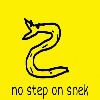

In [5]:
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('a000001.png')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

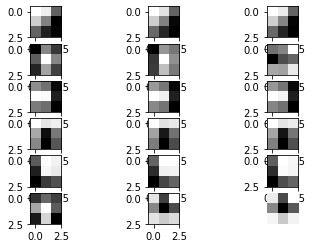

In [44]:
# importing a deep learning model to show you how these convolutions look 
# like in production 
import tensorflow as tf # open source library for scientific methods and vector math 
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() 
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels-fmin)/(fmax - fmin) # Zscore, MinMax normalizing 
n_filters, ix=6,1 

for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.axis('off')
plt.show()




In [45]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  kernels, biases = layer.get_weights()
  print(layer.name)
  print(len(kernels[0][0]))

block1_conv1
3
block1_conv2
64
block2_conv1
64
block2_conv2
128
block3_conv1
128
block3_conv2
256
block3_conv3
256
block4_conv1
256
block4_conv2
512
block4_conv3
512
block5_conv1
512
block5_conv2
512
block5_conv3
512


In [0]:
# early lunch -> 12:30-1:40, 3-3:45 break 
# TRANSFER learning 
# parameters + shape, or just part of shape or just parameters
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and
# utilized only input and till the next layer's output
# PARTIAL SHAPE [beginning of VGG model was transferred to my model]

In [47]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('abc01.jpg', target_size=(224,224)) # because it preserves the dimensions
# from image, convert to array of numbers to feed to NN
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape


(224, 224, 3)

In [0]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img)

In [49]:
featureMaps.shape

(1, 224, 224, 64)

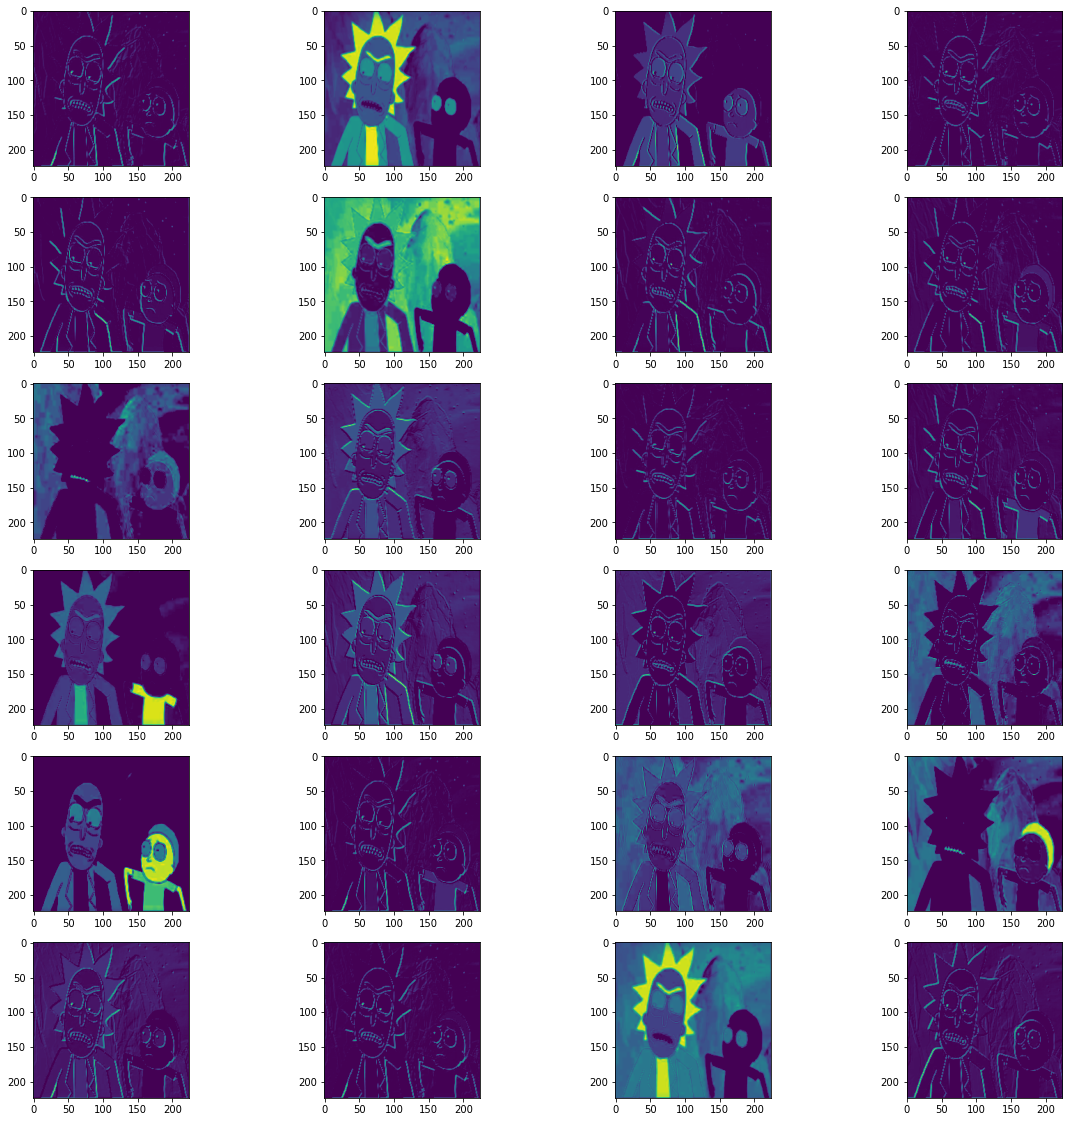

In [52]:
sz = 8
index = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0,:,:, index-1])
  index=index + 1
plt.show()